In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import quadrotor
import math

In [2]:
m = 0.6  
r = 0.2
I = 0.15
g = 9.81
dt = 0.01

In [3]:
def get_linearization(z, u):
    T = z[4]
    u1 = u[0]
    u2 = u[0]
    A = np.array([[1,dt,0,0,0,0],[0,1,0,0,-(dt*(u1+u2)*math.cos(T))/m,0],[0,0,1,dt,0,0],[0,0,0,1,-(dt*(u1+u2)*math.sin(T))/m,0],[0,0,0,0,1,dt],[0,0,0,0,0,1]])
    B = np.array([[0,0],[-(dt*math.sin(T))/m,-(dt*math.sin(T))/m],[0,0],[(dt*math.cos(T))/m,(dt*math.cos(T))/m],[0,0],[(dt*r)/I,-(dt*r)/I]])
    return A,B

In [4]:
#z0 = np.zeros([quadrotor.NUMBER_STATES,])
Teta= 2*np.pi/1000
xs = []
N = 1000
for i in range (N+1):
    x = np.array([[(np.cos(Teta*i))],[-(np.sin(Teta*i))],[(np.sin(Teta*i))],[(np.cos(Teta*i))],[0],[0]])
    xs.append(x) 

xstar = np.array(xs).reshape(1001,6,).T

In [5]:
def get_LQR_trajectory(state,i):
    #N = 1000
    Q = np.identity(6)*1000
    R = np.identity(2)*0.0001
    
    q = [0 for x in range(N+1)]
    u = np.array([[m*g/2],[m*g/2]])
    for b in range(N+1):
        q[b] = -Q @ xstar[:,b]
    P = [0 for x in range(N+1) ]
    K = [0 for x in range(N)]
    p = [0 for x in range(N+1) ]
    k = [0 for x in range(N)]
    P[-1]=Q
    p[-1]=q[-1]
    Mat = [i for i in range(N)]
    Mat.reverse()
    
    A,B = get_linearization(z0, np.array([m*g/2,m*g/2]))
    Bt = np.matrix.transpose(B)
    At = np.matrix.transpose(A)
    for n in Mat:
        
        K[n] = -(np.linalg.inv(Bt @ P[n+1] @ B + R) @ (Bt) @ P[n+1] @ A)
        P[n] = Q + At @ P[n+1] @ A + At @ P[n+1] @ B @ K[n]
        k[n] = -np.linalg.inv(Bt@P[n+1]@B + R)@(Bt)@p[n+1]
        p[n] = q[n] + At @ p[n+1] + At @ P[n+1] @ B @ k[n]

    return K[i]@(state - xstar[:,i]) + u.reshape(2,)

In [6]:
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
z0[0]=1
t, state, u = quadrotor.simulate(z0, get_LQR_trajectory, horizon_length, disturbance = False)

<IPython.core.display.Javascript object>


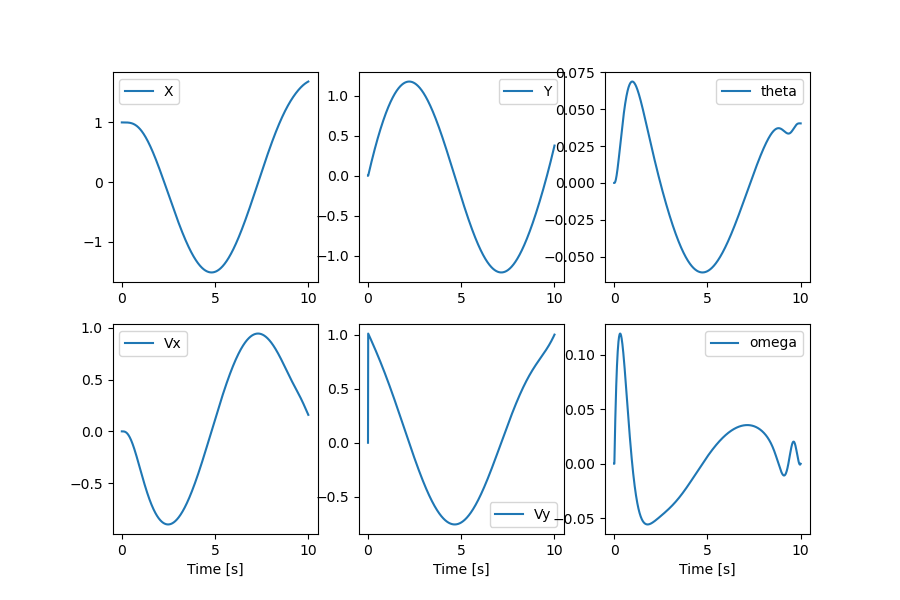

<IPython.core.display.Javascript object>


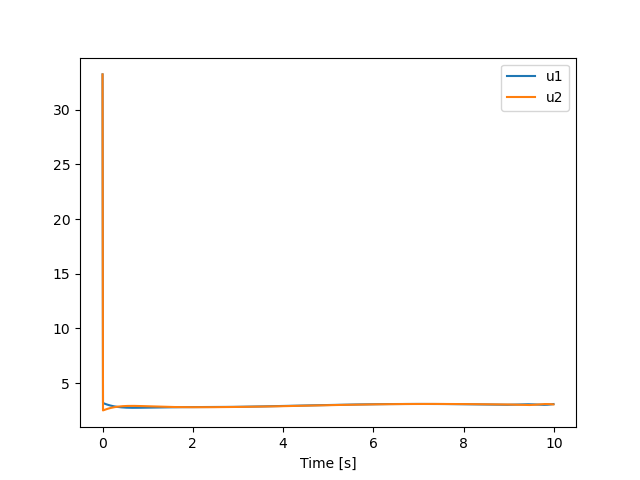

Text(0.5, 0, 'Time [s]')

In [7]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

In [8]:
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAaMltZGF0AAACoQYF//+d
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg
LSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg
LSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg
bWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n
ZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg
ZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOCBsb29rYWhlYWRfdGhy
ZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVy
YXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9h
ZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBr
ZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xv
b2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFw
bWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABKYZYiEABH//veIHzLL
afk613IR560urR9Q7kZxXqS9/iAAAAMAAAMAAAMACpJYniKH8XjN/AAAAwAAt4AXsAwgCqgMKj6I
dndnTzAIiR6+OnDbVkTjpPexGHLjoXY30hkXEhSE9kEKIJNbrApCI4G73ihHZi4T1K1iog5Wc0p6
pLHThCwCmnYhSqYpYbTo2n5tZjl9Sersc3rmxTCU1aG5ejWlf2ZiBPtJ6vuZEf6FCWPekrjf3iOx
g9nYeAC3//ekaJ6Uup8pEnX74AtF5miPCXmGYp1VgIlMhblKE1f5XLlxb1HUXmuG+fEgDCAJNggr
SWMoFVS8OFpaDDMvSO64pmzh6vHDoKtfmcA4i12uUsh7rwNZe/BI7LdbaaCmFlaKG6p3WlZZBOgL
c6Xh6KGqBk+DXTIvzmnGdaE/vYVZrpQqE5tWlH1wLzpsCVXhaMhwyKlIHYXCzI57hN1GXk5AJs78
kL3L0uFd6c/RFa7OFV/kuFKHj+kqM4DkzP7PBgAC6AAADAn+uXo8j5J0TvKiQM4nLDD+XAg9NeD6
W8cce2l/FR62IVTJaZmpZXtWP3P3BP8Aty1kv38ceunYStFyA/05L8hPnpct8GwCWlzTtbCvTReE
HJz1a5gtpTABNPy+/tCuvMR6WgJvSsNn61ezHOjGNwqbjeiH0YSDdQMKznomzDwO9Guv8vX0Axnn
UksKqHboJ5g5oIo877MWl4BrV0RlKw0IFwXY/uC1/NrVms+YIRkAbT20GeVQYPen6zGAVf2KCyuv
i/o7vB46nPxSm/qMgeMjM/laohkgNM0SBaFCXrzNuC+3snatr9vBmkzqlolCtOpEXoijNRPf2sX0
Sg8AuZkqAHN/k60MTNXn1Sra7J2rdNwCn6l/5a8jeEBwuzeTuyDMFytRDj+ei/wYryU00dNQJ4KR
pnFfiJuXJ8LyOU832g9SwiY/rim8AAADAAADAAADAAAJUchT685ptYvFSJ5vRPBnShcaoVlbv1fv
nAdJyQ9/h4Y2MNTtxdM5/2ubtKfAQmv/f4fxiuVos5NHnHCOA54iXCHkF2+KCSvxjH837gD8r5Lg
vudrJ1j54JkDGsG6y6lnuNxvCAHUYC1dFOeeXj/OnDH3oRVc0spfxoKmrdjIb21n9P9d7r4TN8Ob
HE4fjwmtp43o4qyugzEbdTaOF22JNee+dRYXAayjEWwaPQmq8hmvqUMjwJs3aGt3ALm+CrSl9T5E
yKbw2ErxZBytHO+1/8hqthoH2mJIBqiCSA3Tc3rB/5FaTBrknzyEbXMuyUY/6kdM/z2vNwUquAPk
8XEAxFgacBdsgG2GFtDMYAY8/0fs4L8Z204YrgqedjfPsHcmd+kYEcaLegD5YX9qgAAB4Db/CAAP
aKxcmc2TS8VlHGe+erFx4IOqLldbEiG3gYHJlj+vva6K0NzTc9KZfWv92gAj2LVPZaffCqVaRVL9
AwOwnd9e/fCqOE64uyRQrpWa2SS0Y5OpWnlzzqDvSpG99L8JyPrsHfPLFEobGCTo8GXmfDljwpyH
91hf6dp8meanURRRgGD4cQ4NspiT80PR3jzOwZB1FXlQ9MNnQRy0ncTnHI9yDU1eA+TGETG2Cwj+
mRTLXxswQIRZiWlGDsr4xTSzhD9KPWC1Kb3zs2G3+xxJTjiz/Vg0uqUBm5cSXtLEQmh38Z6cerdf
aj4VDDgc9IvtXMMQ5hF2VTLVsrMyC+J1oBXKD6FJME3Wk3MijUz9EC8eKB42z3///7AlHrrzO8fz
IRECWAtePXtkE1lD70vFFl8BW2CJxQno+TiRD6Q2f//0c2t8c74a1YyjKkUf2g7Yqi+tjVXIXbYu
Ckwe+jr1MZ497lFk/Wne/Qt/dB7Ln6oSDhZiOuzBG56GvloTZk9iq3gHN/LwdDWMYDTJXwR27Hpm
vN/QidquJ2uzOw/qnQYK/tAErbUYTpJeQZ3Xgj9tDZXsFZ6x23Oig8mMZcxcJvUGvsn80PeUzXtM
PNUEH21/bUjd6pUmYAABu9fBXzymSVRPwkdigM3QkCOxo/YEVToKrW5reOqxoSiXtcRHJ291EBeU
duSTVWqtQ24dN9xsnjXNBgDZcZq1lW2zRQOhW8rzkDAcTwVX/0z58eUs2B8KzUEjsYLkG9rj3PEY
4m8j739oRvAqnEBK/etowfuYWq47XOMUhKaUDHpb0WQ2kJphDWoWfTUlsmC7h0A5UBKsesh03JyO
Rw5lgPKfQZW2+tgALX6sdjMTfkTKu1hkqmulHCupBmJ/7FSvp2ggxOFSqVtC7U0tPWdKgK3IlNHl
WfAjbfbvG7k0VZpsYAZgMFNNLjFnYvc0TBiVqz2C6BYLTnl1jSufelGa8FxlgS6toWRPNIWiL/cZ
CGLgX1GZChbWQdZ5r8Oy3Jx+dTKpYsQb7CEELzUJ5C/Mj84IjkREEeltByz9KTIQJdRVUxWopOD7
7VeGHwJuU/FRcv7eruQZRBwiTMatjNXfbnl307bKec5hq/j+DOlgfVHIuYsd7liTOxX1XVsTKWoX
yKCb6MTMypnsF1j8fwXL99lTrIai5q5rw/B/pNCEL3gCXGWvpdiBakxT++8E/qIBab69yDjdMeBl
p0WTJJ2ikOOKNG6X/FNOtylpuxyCO5UEmZMOWvZq07SLAet1M0lnAmJpbknJRpEzL+SrehBp89zE
5Dfam7ivvJAJWsgA7dTIzuN8ZvZZsRSQm4lnuKX4nELtTbAr4NEhDgcfX5ETul5zCgFNoyQxkfq+
vZSJhvYASNZ//kt/990YYjc3a5n7FessmHf+Pzx8foGQ636495O66GwBHncopLJ4f8tgwtfIT02O
wQJeX58vqQ2omoz0a+6jTXk6TcTJysTVO+20b2MoJDlIG5CdeqlLBBqUEHzs536Y4AA/gAUyRK6S
eZ/MtUgAAAMAABnD8/0Ki